# Project 1: Prediction of Sales Prices of Used Vehicles 

### Introduction

Various Data of used car around 100,000 listings, including various manufacturers such as Audi, BMW, Benz, Ford, Skoda and so on are available. With the help of this data set and the Machine Learning knowledge, we have to generate a Model which is like a tool to Predict the Market Price of the Car. 

### Scope of the Project

From this data, We are focussing on one Particular Brand Skoda. Later from this knowledge it can applied for any other available Brands. Since it is about predicting value of a Car, this is a Regression problem.

Our approach as follows:
1. Cleaning the Data set.
2. Sorting out the Missing Values.
3. Replacing zero values with reasonable Mean values.
4. Visualizing the Data.
5. Finding the influencing factors for Price.
6. Encoding the Object type datas.
7. Model Selection for Training.
8. Tuning the Hyperparameter of the Selected Model.
9. Finding the Best Model.
10. Predicting and Validating the results.

In [1]:
import numpy as np                 # linear algebra
import pandas as pd                # data processing 
import matplotlib.pyplot as plt    # data visualization
import seaborn as sns              # data visualization

## 1) Data Exploration

### Importing and Cleaning the Data

The source of the file is available in the link: https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes/notebooks

We have downloaded the file and saved it in our local system. Here we are accessing the file with the help of Pandas read CSV file.

In [2]:
# out of many brand data file we are focussing only on Skoda
df = pd.read_csv("../projektarbeit/skoda.csv")
df.head(15)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Octavia,2017,10550,Manual,25250,Petrol,150,54.3,1.4
1,Citigo,2018,8200,Manual,1264,Petrol,145,67.3,1.0
2,Octavia,2019,15650,Automatic,6825,Diesel,145,67.3,2.0
3,Yeti Outdoor,2015,14000,Automatic,28431,Diesel,165,51.4,2.0
4,Superb,2019,18350,Manual,10912,Petrol,150,40.9,1.5
5,Yeti Outdoor,2017,13250,Automatic,47005,Diesel,145,51.4,2.0
6,Superb,2019,15250,Manual,14850,Petrol,145,40.9,1.5
7,Octavia,2019,18950,Automatic,5850,Diesel,150,50.4,2.0
8,Kodiaq,2019,29900,Automatic,2633,Petrol,150,31.4,2.0
9,Octavia,2017,18990,Manual,20000,Petrol,150,43.5,2.0


From the above file it includes the features such as Model of the car, Year - purchased year, Price value, Transmission, Mileage - total number of miles reached so far, Fueltype, Tax - road tax, mpg - fuel consumption and Enginesize.  

In [3]:
# to view various info of available data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6267 entries, 0 to 6266
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6267 non-null   object 
 1   year          6267 non-null   int64  
 2   price         6267 non-null   int64  
 3   transmission  6267 non-null   object 
 4   mileage       6267 non-null   int64  
 5   fuelType      6267 non-null   object 
 6   tax           6267 non-null   int64  
 7   mpg           6267 non-null   float64
 8   engineSize    6267 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 440.8+ KB


From the above information it does not include any missing values. Out of nine features three are Object type and remaining are Numeric data type. 

In [4]:
# the shape of our data 
df.shape

(6267, 9)

In [5]:
# to look for missing values
df.notnull()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
6262,True,True,True,True,True,True,True,True,True
6263,True,True,True,True,True,True,True,True,True
6264,True,True,True,True,True,True,True,True,True
6265,True,True,True,True,True,True,True,True,True


For my convinence the Year feature has been changed in to Age. 

In [6]:
# to calculate vehicle age 
df['age'] = 2020 - df['year']
df = df.drop(columns = 'year')    # remove that column
df.head()

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age
0,Octavia,10550,Manual,25250,Petrol,150,54.3,1.4,3
1,Citigo,8200,Manual,1264,Petrol,145,67.3,1.0,2
2,Octavia,15650,Automatic,6825,Diesel,145,67.3,2.0,1
3,Yeti Outdoor,14000,Automatic,28431,Diesel,165,51.4,2.0,5
4,Superb,18350,Manual,10912,Petrol,150,40.9,1.5,1


In [7]:
# to count number of zero value in each column
df.isin([0]).sum()

model             0
price             0
transmission      0
mileage           0
fuelType          0
tax             217
mpg               0
engineSize        5
age             276
dtype: int64

From the above information we have few zero values in the features Tax and Enginesize. To get more accuracy on the model we have decided to include the reasonable values for these features. 

In [8]:
# totally we have these much zero values for 'engineSize' and 'tax'
# the age zero values represents the car purchased year on 2020
print(sum(df['engineSize'] == 0))
print(sum(df['tax'] == 0))

5
217


Since we have certain number of Zero Values in Enginesize and Tax. We are initially replacing that value with a Nan type.

In [9]:
# the zero values 
df[["engineSize","tax"]] = df[["engineSize","tax"]].replace(0,np.NaN)   # replacing Zero by Nan values
df.isnull().sum()

model             0
price             0
transmission      0
mileage           0
fuelType          0
tax             217
mpg               0
engineSize        5
age               0
dtype: int64

In [10]:
median_to_fill = df.groupby("model").median()       # Groupby.Median: Compute median of groups, excluding missing values.
median_to_fill = df.groupby("model").median()  

for model, row in median_to_fill.iterrows():        # Iterrows: Iterate over DataFrame rows
    rows_to_fill = (df["model"] == model)
    df[rows_to_fill] = df[rows_to_fill].fillna(row) # Fillna: Fills the NaN values with a given substitute number

As said earlier, the zero values has now been calculated through median function based on Model feature. 

In [11]:
# to count number of zero value in each column
df.isin([0]).sum()

model             0
price             0
transmission      0
mileage           0
fuelType          0
tax               0
mpg               0
engineSize        0
age             276
dtype: int64

In [12]:
df.head(15)

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age
0,Octavia,10550,Manual,25250,Petrol,150.0,54.3,1.4,3
1,Citigo,8200,Manual,1264,Petrol,145.0,67.3,1.0,2
2,Octavia,15650,Automatic,6825,Diesel,145.0,67.3,2.0,1
3,Yeti Outdoor,14000,Automatic,28431,Diesel,165.0,51.4,2.0,5
4,Superb,18350,Manual,10912,Petrol,150.0,40.9,1.5,1
5,Yeti Outdoor,13250,Automatic,47005,Diesel,145.0,51.4,2.0,3
6,Superb,15250,Manual,14850,Petrol,145.0,40.9,1.5,1
7,Octavia,18950,Automatic,5850,Diesel,150.0,50.4,2.0,1
8,Kodiaq,29900,Automatic,2633,Petrol,150.0,31.4,2.0,1
9,Octavia,18990,Manual,20000,Petrol,150.0,43.5,2.0,3


In [13]:
df.describe() 

,price,mileage,tax,mpg,engineSize,age
count,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000
mean,14275.449338,20118.452050,122.427796,56.589165,1.434594,2.497686
std,6332.051106,19955.410762,48.592766,12.037576,0.392810,1.734754
min,995.000000,5.000000,20.000000,30.100000,1.000000,0.000000
25%,9495.000000,5812.500000,125.000000,50.400000,1.000000,1.000000
50%,12998.000000,14653.000000,145.000000,57.700000,1.400000,2.000000
75%,17990.000000,28000.000000,145.000000,62.800000,2.000000,3.000000
max,91874.000000,300000.000000,325.000000,201.800000,2.500000,16.000000


From the above data it seems like they have meaningful values. We will conclude that in upcoming sections through Correlation matrix and Data visualization methods. 

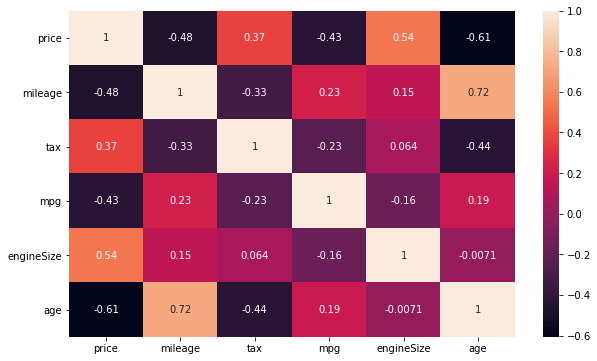

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True) # annot=True shows the values inside the box

The Correlation matrix shows the clear correlation inbetween variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

The Mileage and Age clearly indicates the Strong influence against Price. It has a valid reason and logic to accept this 
influence. The second set of pair Tax and mpg has bit lower influence over Price. Finally the Enginesize increases and the Price increases too, pretty much it's reasonable to agree that the size grows along with the cost of the Vehicle apparently. 

In [15]:
df.corr().abs()   # abs: generates the absolute value

,price,mileage,tax,mpg,engineSize,age
price,1.000000,0.480513,0.372055,0.432489,0.538685,0.606285
mileage,0.480513,1.000000,0.327819,0.225839,0.148243,0.724449
tax,0.372055,0.327819,1.000000,0.230781,0.064489,0.435842
mpg,0.432489,0.225839,0.230781,1.000000,0.162855,0.187190
engineSize,0.538685,0.148243,0.064489,0.162855,1.000000,0.007073
age,0.606285,0.724449,0.435842,0.187190,0.007073,1.000000


In the above absolute value distribution simply it shows the correlation between each and every variables available in the data clearly.

The number of attributes in our Data are nine which has six Numerical and three Categorial i.e. Quantitative data types. Since we are doing a regression analysis it is important to visualize the importance of Quantitative datas as well. In the upcoming Encoding section we will convert these category datas in our desired numerical format. 

Because of these two different data types such as numerical and categorial in our Model, we will visualize the data in two sets as follows: 

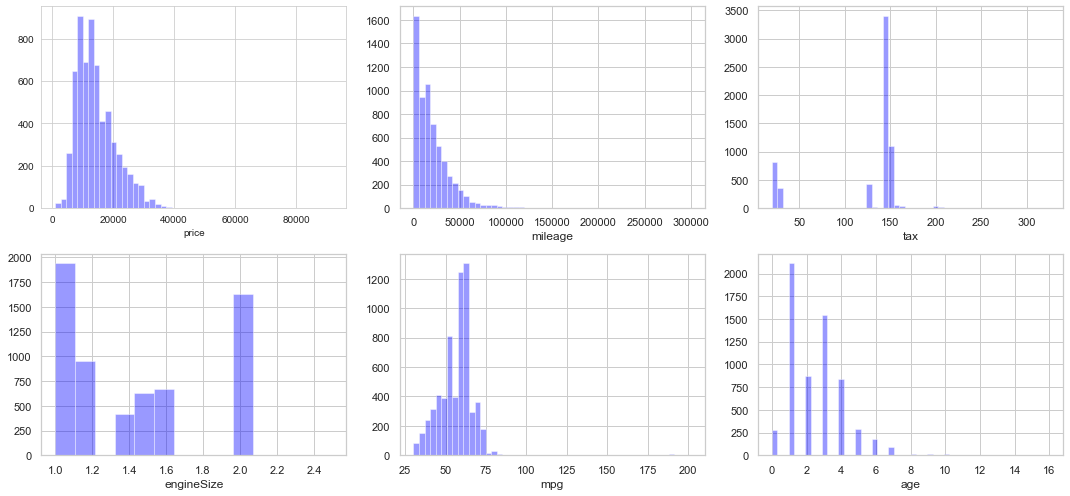

In [16]:
numeric_type = df[['price','mileage','tax','engineSize','mpg','age']] # Includes only Int and Float type Datas

fig = plt.figure(figsize=(15,10))                             # Figsize: Dimension of the plot 
                                   
for index,col in enumerate(numeric_type):                     # Enumerate iterates over the numeric_type
    sns.set_style('whitegrid')                                # Background theme of the plot
    plt.subplot(3,3,index+1)                                  # Controls the rows and columns, Index for placing
    sns.set(font_scale = 1.0)                                 # Scaling the Font size
    sns.distplot(df[col],kde = False, color='blue')           # Dist plot: univariate distribution of observations
fig.tight_layout(pad=1.0)                                     # To adjust subplots Label 

Observation from the Data: 
1. The distribution of Price are right skew and shows the mean of 14275 GBP, most of the vehicles are in this value.
2. The distribution of Mileage also right skew almost many of the vehicles are within the range of 20000 miles.
3. The Tax distribution shows the mean value of around 120 GBP.
4. The EngineSize distribution shows mean value of 1.4 for the vehicle.
5. The distribution of mpg shows the value of 60 for most of the vehicle. 
6. The Age distribution shows that 16 years old vehicle and most of them are in 2.5 years.

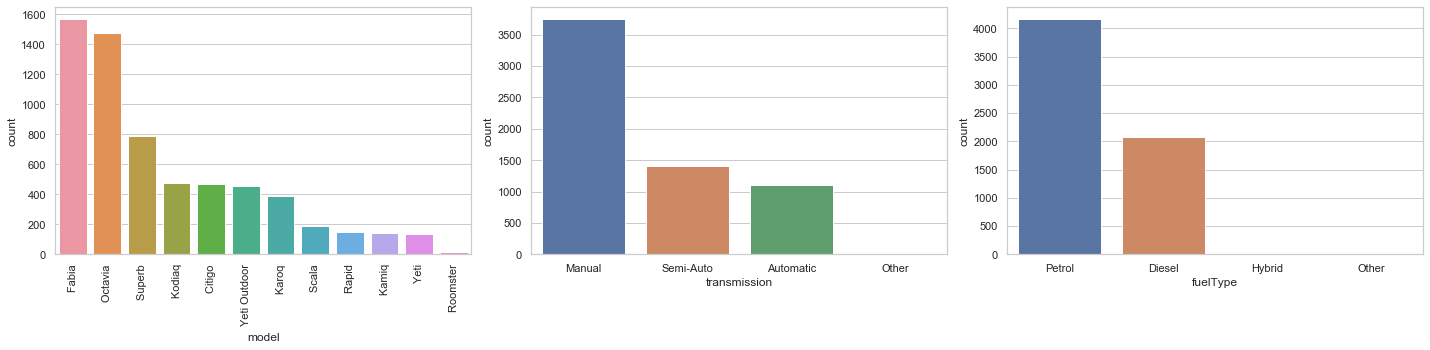

In [17]:
category_type = df[['model','transmission','fuelType']]         # Includes only Object type Datas

fig = plt.figure(figsize=(20,5))

for index,col in enumerate(category_type):
    sns.set_style('whitegrid')
    plt.subplot(1,3,index+1)
    if(index == 0):
        plt.xticks(rotation=90)                                   # To make X-axis Label in vertical represantation
    sns.set(font_scale = 1.0)
    sns.countplot(df[col], order = df[col].value_counts().index)  # categorical bin using bars representation
fig.tight_layout(pad=1.0)                                         # Order to plot the categorial levels from max to min

Observation from the Data:
1. From the Model distribution half of the Car Models sold are Fabia and Octavia.
2. More than 50 percent of the Car sold are coming under the Manual Transmission category. 
3. It is evident that People bought Vehicle with a Fuel type of Petrol the most. 

### Plotting over Price

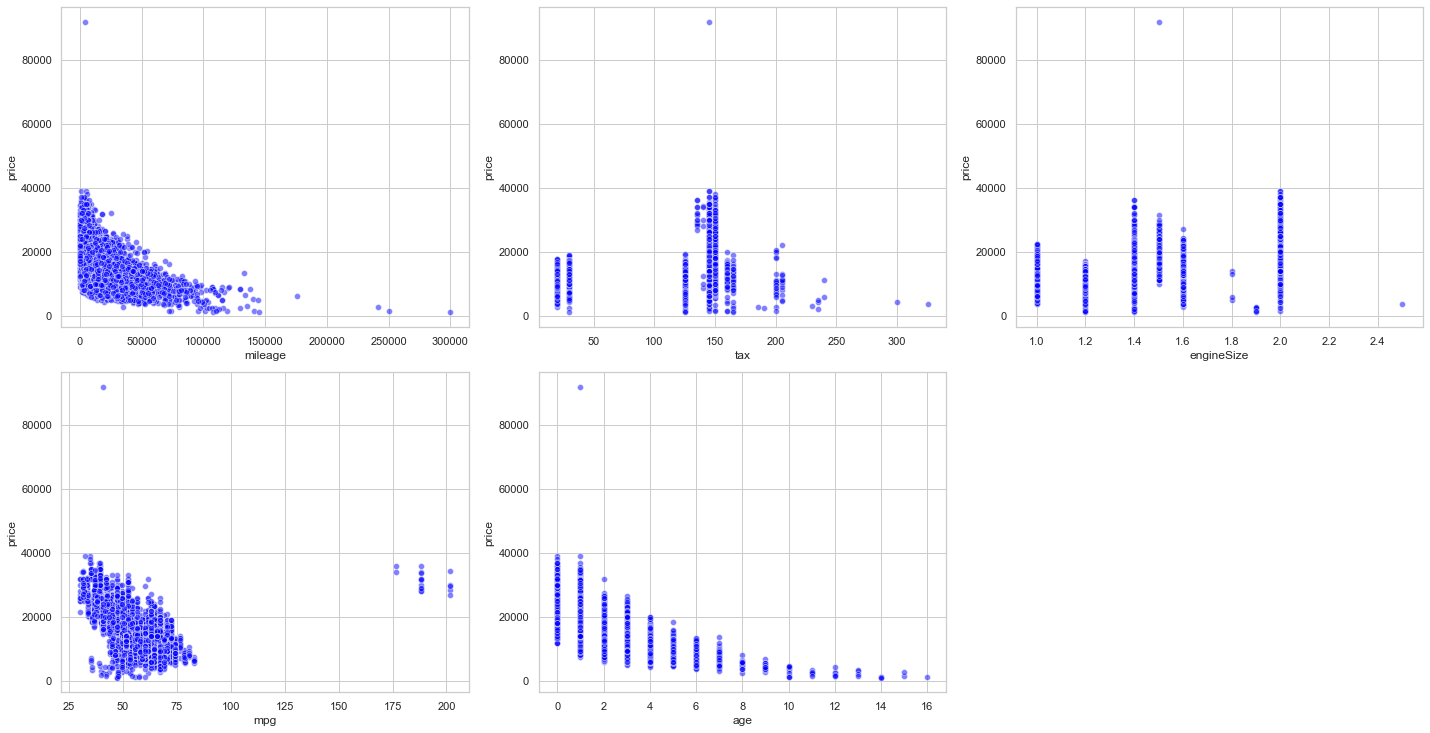

In [18]:
# various numeric_type data influence over price
numeric_type = df[['mileage','tax','engineSize','mpg','age']]               # Updated the set without Price

fig = plt.figure(figsize=(20,20))

for index,col in enumerate(numeric_type):                                   
        sns.set_style('whitegrid')                                          
        plt.subplot(4,3,index+1)                   
        sns.set(font_scale = 1.0)
        sns.scatterplot(data = df, x = col, y = 'price',color='blue', alpha = 0.5) 
fig.tight_layout(pad=1.0)                                                   

Observation  from the Data:
1. In the Mileage plot couple of Vehicles has reached above 250000 miles which has low Prices. 
2. The Tax distribution over price shows high Tax value for couple of Vehicles in low Price range might be a Outliers. 
3. The Engine size of 2.5 shows low price might be chance of Outliers. 
4. The mpg distribution shows bunch of Vehicles has around 170 to 200 mpg which should be a Outliers. 
5. The Age plot shows reasonable distribution over Price.

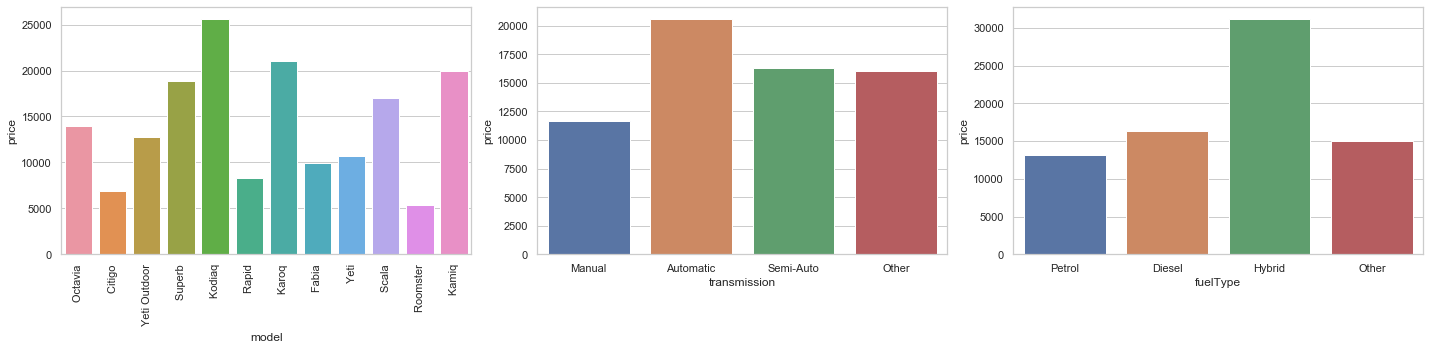

In [19]:
# various category_type data influence over price

fig = plt.figure(figsize=(20,5))

for index,col in enumerate(category_type):
    sns.set_style('whitegrid')
    plt.subplot(1,3,index+1)
    if(index == 0):
        plt.xticks(rotation=90)
    sns.set(font_scale = 1.0)
    sns.barplot(x=df[col], y='price', data = df, ci = None) # ci: to avoid error bars
fig.tight_layout(pad=1.0)

Observation from the Data:
1. Various Model in this Skoda brand shows various Price values.
2. In this Brand Automatic transmission type has higher Price values. 
3. The Hybrid type Vehicles are evidently high in Price than any other fuel type available options.

## 2. Data Representation

In our Model Data we have seperated our features as 2 types. In Numerical data type we have no any missing values. In Categorial data type, we need to perform one hot coding before letting them to join our model. 

There are two ways to encode the data : Label Encoding and One Hot Encoder.

Here we have chosen to go with One Hot Encoder. What one hot encoding does is, it takes a column which has categorical data, which has been label encoded, and then splits the column into multiple columns. The numbers are replaced by 1s and 0s, depending on which column has what value. In our model we will be getting around twenty columns. 

Decided to choose One Hot Encoder: We might run into situations where, after label encoding, we might confuse our model into thinking that a column has data with some kind of order or hierarchy, when we clearly don’t have it. To avoid this, we ‘OneHotEncode’ that column.

### Encoding 

In [20]:
# Converting all the categorial data into some useful numerical data for better evaluation using One-hot Encoding
from sklearn.preprocessing import OneHotEncoder                                     # To perform encoding of data
df_onehot = pd.get_dummies(df,columns=['model', 'transmission','fuelType'])         # Encoding shown columns 
print(df_onehot.shape)
df_onehot.head()

(6267, 26)


,price,mileage,tax,mpg,engineSize,age,model_ Citigo,model_ Fabia,model_ Kamiq,model_ Karoq,...,model_ Yeti,model_ Yeti Outdoor,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,10550,25250,150.0,54.3,1.4,3,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,8200,1264,145.0,67.3,1.0,2,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,15650,6825,145.0,67.3,2.0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,14000,28431,165.0,51.4,2.0,5,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
4,18350,10912,150.0,40.9,1.5,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [21]:
#Splitting the Train and Test data
from sklearn.model_selection import train_test_split         # Splitting up the data as Train and Test set respectively
X = df_onehot.drop(columns=['price'])                        # X includes all data except target variable
y = df_onehot['price'].copy()                                # y has only target variable-Price
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0, test_size = 0.30) # Test size 30%

In [22]:
y_train.shape

(4386,)

## 3.Training

### Model Selection

To select our correct Model it is always better to consider couple of algorithms and evaluate their performance through cross-validation method. We are interested in the following algorithms:

1. Linear Regression
2. Gradient Boosting
3. Decision Tree
4. Random Forest

In our case We have not Standardized our values because the algorithms that we chosen here does not requires the value to be standardized scalar.

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score                         # Evaluate a score by cross-validation
from sklearn.metrics import r2_score                                        # Coefficient of determination 

# Finding the best fit algorithm for our model
model_list = [(LinearRegression(), 'LinearRegression'),                     # List included all desired algorithms
              (GradientBoostingRegressor(),'GradientBoostingRegressor'),
              (DecisionTreeRegressor(),'DecisionTreeRegressor'),
              (RandomForestRegressor(),'RandomForestRegressor'),
              ]

model_score = []

for i in model_list:
    model = i[0]                                                           # Scoring: Coefficient of determination r2
    score = cross_val_score(model,X_train,y_train,cv=4, scoring='r2')      # model: estimator, cv: splitting strategy
    print(f'{i[1]} score = {score.mean().round(2)*100}')                   # Score.mean: Shows mean of all scores                                     
    model_score.append([i[1],score.mean()])

LinearRegression score = 90.0
GradientBoostingRegressor score = 92.0
DecisionTreeRegressor score = 85.0
RandomForestRegressor score = 92.0


So from the Model selection block we found that out of all algorithms Gradient Boosting Regressor and Random Forest Regressor perfoms well. So we have decided to take Gradient Boosting regressor and tune its hyperparameter to attain maximum accuracy for our analysis.

Gradient boosting is a machine learning technique for regression problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

### Tuning model's Hyperparameter

Now it is important to tune the Hyperparameter of the model to attain better accuracy. There are no any optimum value to tune any model it can be acheived only by continuous tuning. In this model we have decided to tune the following three Hyperparameters:

1. n_estimators - number of boosting stages to perform, large number usually results in better performance.
2. max_depth - maximum depth limits the number of nodes in the tree, best tuning parameter for best performance  
3. learning_rate - Shrinks the contributiuon of each tree, choosing three different value for good performance

Totally Grid search will run 3x3x3 = 27 models to find the best combination of the Hyperparameters. Actually based on our selection,in each model Gridsearch Cv will run cross validation with 4 folds. 

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
# selecting the hyperparameter
param_grid = [
    {'n_estimators' : [200,300,500],                 # number of boosting stages to perform
          'max_depth' : [2,4,6],                     # maximum depth limits the number of nodes in the tree 
          'learning_rate' : [0.1,0.3,0.5]}           # learning rate: Shrinks the contributiuon of each tree                          
]

# Through grid search finding the best Model
grid_search = GridSearchCV(GradientBoostingRegressor(), # estimator object
                           param_grid,                  # includes hyperparameter values
                           cv=4,                        # cross-validation splitting strategy     
                           scoring = 'r2')              # coefficient of determination

In [53]:
grid_search.fit(X_train,y_train)                   # fitting the values in to grid search 
y_pred = grid_search.predict(X_test)               # predicting the Price value 
my_model = grid_search.best_estimator_             # Best estimator has the parameters of better perfomance
my_model                                           # Best model 

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

The my_model has the best performing parameters among all other possible combinations. This model will be used to train and evaluate results for our analysis. 

## 4.Evaluation

In [54]:
my_model.fit(X_train,y_train)                     # Training the best model with datas
prediction = my_model.predict(X_test)             # Predicting the Price values

In [55]:
# To generate a comparison table between predicted and actual Price of Car
result = X_test.copy()
result["predicted"] = my_model.predict(X_test)
result["actual"]= y_test.copy()
result =result[['predicted', 'actual']]
result['predicted'] = result['predicted'].round(2)
result.sample(10)

,predicted,actual
4154,9654.45,9475
3495,7412.72,6990
1826,17800.22,16726
2761,10767.30,10690
2329,7650.18,6999
4167,26804.88,25950
66,15964.07,13600
4928,12272.19,13500
134,13016.43,14950
2764,12843.37,12498


In the above comparison table it is pretty clear that our model have perfomed in a better way. Let see the predicted and actual price values in plot.

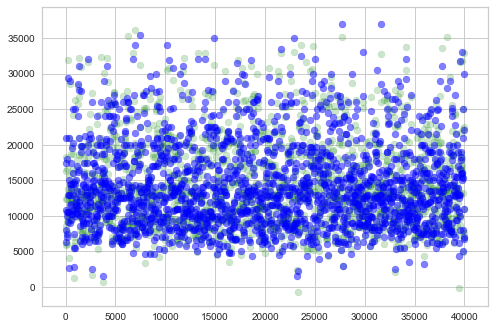

In [59]:
# Data visulaization of actual price and predicted price of Car
XX = np.linspace(0, 40000, 1881)                                 # return numbers in selected range 
plt.scatter(XX, y_pred, color="green", alpha = 0.2)              # green dots represents y_pred against XX         
plt.scatter(XX, y_test, color="blue", alpha = 0.5)               # blue dots represents y_test against XX

Prediction Error Plot:

A prediction error plot shows the actual targets from the dataset against the predicted values generated by our model. This allows us to see how much variance is in the model. Data scientists can diagnose regression models using this plot by comparing against the 45 degree line, where the prediction exactly matches the model.

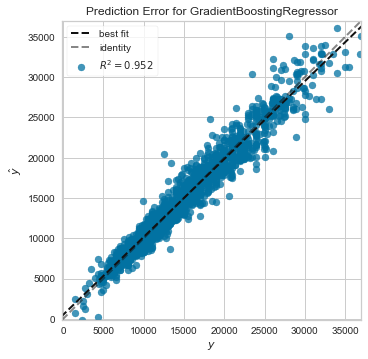

In [57]:
# Result visualization
from yellowbrick.regressor import PredictionError   # To plot prediction error
# Instantiate the linear model and visualizer
visualizer = PredictionError(my_model)
visualizer.fit(X_train, y_train)                    # Fit the training data to the visualizer
visualizer.score(X_test, y_test)                    # Evaluate the model on the test data
visualizer.show()                                   # Finalize and render the figure

The Y-axis as predicted price and X-axis as actual price, we have grey dashed line which has one hundred percent accuracy it means actual = predicted. Our model has a Rsquared value of 0.952. Our best model really perfomed well. 

## Conclusion

So we conclude that through Hyperparameter tuning we have increased our model performance and finally achieved the Rsquared value of 0.952

## Future Works

From this knowledge we can also predict the Price value of any other available Car data. 